# 0. Definición del problema

Usted ha sido contratado como parte de un equipo de análisis del rendimiento de estudiantes en la facultad de ingeniería y de ciencias de la universidad de Wisconsin, para participar en el proyecto HESPE (Higher Education Student Performance Evaluation). Deberá, por lo tanto, poner a prueba todas las habilidades y conocimientos adquiridos a lo largo de este curso. 
Su primer desafío consiste en predecir el resultado de los estudiantes al momento de cursar una asignatura en la universidad. Para esto, se ha construido un set de datos con 32 características, en donde las 10 primeras de ellas corresponden a información personal, de la 11 a la 16 corresponden a preguntas familiares, y el resto corresponde a hábitos de estudio. Se recolectaron 145 instancias para este estudio, que fue llevado a cabo durante 2019. Cada instancia corresponde a lo contestado por un estudiante en una encuesta.
A continuación, se describe el set de datos:
1. student_id
2. age - Student Age (1: 18-21, 2: 22-25, 3: above 26)
3. sex - Sex (1: female, 2: male)
4. graduated_h_school_type - Graduated high-school type: (1: private, 2: state, 3: other)
5. scholarship_type - Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
6. additional_work - Additional work: (1: Yes, 2: No)
7. activity -Regular artistic or sports activity: (1: Yes, 2: No)
8. partner - Do you have a partner: (1: Yes, 2: No)
9. total_salary - Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
10. transport - Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
11. accomodation - Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
12. mother_ed - Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13. farther_ed - Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
14. siblings - Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
15. parental_status - Parental status: (1: married, 2: divorced, 3: died - one of them or both)
16. mother_occup - Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
17. father_occup - Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
18. weekly_study_hours - Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
19. reading_non_scientific - Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20. reading_scientific - Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
21. attendance_seminars_dep -Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
22. impact_of_projects - Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
23. attendances_classes - Attendance to classes (1: always, 2: sometimes, 3: never)
24. preparation_midterm_company - Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
25. preparation_midterm_time - Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
26. taking_notes - Taking notes in classes: (1: never, 2: sometimes, 3: always)
27. listenning - Listening in classes: (1: never, 2: sometimes, 3: always)
28. discussion_improves_interest - Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
29. flip_classrom - Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
30. grade_previous - Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31. grade_expected - Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
32. course_id
33. grade - OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

# 1. Obtención de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, cohen_kappa_score, make_scorer
from hyperopt import fmin, tpe, hp, space_eval

In [4]:
#cargar los datos
df = pd.read_csv('hespe-data.csv', sep = ';')

## 2. Estructura y Limpieza de datos

In [5]:
df.shape

(145, 33)

In [6]:
#Observar algunos registros
df.head(2).T

,0,1
student_id,STUDENT1,STUDENT2
age,2,2
sex,2,2
graduated_h_school_type,3,3
scholarship_type,3,3
additional_work,1,1
activity,2,2
partner,2,2
total_salary,1,1
transport,1,1


In [7]:
#Revisar valores perdidos evidentes
df.isnull().sum().sum()

np.int64(0)

In [8]:
#Vemos cuantos valores unicos de student id hay
df['student_id'].nunique()

145

In [9]:
#Vemos cuantos valores unicos de course id hay
df['course_id'].nunique()

9

In [10]:
#Revisar registros duplicados
df.duplicated(subset = 'student_id').sum()

np.int64(0)

In [11]:
#Eliminar columna student_id, ya que no es útil para el analisis
df.drop(columns = 'student_id', inplace = True)

In [12]:
#Revisar los tipos de variables dentro del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           145 non-null    int64
 1   sex                           145 non-null    int64
 2   graduated_h_school_type       145 non-null    int64
 3   scholarship_type              145 non-null    int64
 4   additional_work               145 non-null    int64
 5   activity                      145 non-null    int64
 6   partner                       145 non-null    int64
 7   total_salary                  145 non-null    int64
 8   transport                     145 non-null    int64
 9   accomodation                  145 non-null    int64
 10  mother_ed                     145 non-null    int64
 11  farther_ed                    145 non-null    int64
 12  siblings                      145 non-null    int64
 13  parental_status               145 n

In [13]:
#Imprimir los valores únicos para revisar que coincidan con la descripción entregada
df.apply(lambda col: col.sort_values().unique(), axis = 0)

age                                               [1, 2, 3]
sex                                                  [1, 2]
graduated_h_school_type                           [1, 2, 3]
scholarship_type                            [1, 2, 3, 4, 5]
additional_work                                      [1, 2]
activity                                             [1, 2]
partner                                              [1, 2]
total_salary                                [1, 2, 3, 4, 5]
transport                                      [1, 2, 3, 4]
accomodation                                   [1, 2, 3, 4]
mother_ed                                [1, 2, 3, 4, 5, 6]
farther_ed                               [1, 2, 3, 4, 5, 6]
siblings                                    [1, 2, 3, 4, 5]
parental_status                                   [1, 2, 3]
mother_occup                                [1, 2, 3, 4, 5]
father_occup                                [1, 2, 3, 4, 5]
weekly_study_hours                      

No se observa nada extraño, solo notamos que la opcion 6 en mother_occup, la opción 3 en attendances_classes y la opción 5 en grade_expected nunca fueron seleccionadas.

Usamos ahora la información entregada para asignarles tipos a cada variable:
- age: Cualitativa ordinal
- sex: Cualitativa nominal
- graduated_h_school_type: Cualitativa nominal
- scholarship_type: Cualitativa ordinal
- additional_work: Cualitativa nominal
- activity: Cualitativa nominal
- partner: Cualitativa nominal
- total_salary: Cualitativa ordinal
- transport: Cualitativa nominal
- accomodation: Cualitativa nominal
- mother_ed: Cualitativa ordinal
- farther_ed: Cualitativa ordinal
- siblings: Cualitativa ordinal
- parental_status: Cualitativa nominal
- mother_occup: Cualitativa nominal
- father_occup: Cualitativa nominal
- weekly_study_hours: Cualitativa ordinal
- reading_non_scientific: Cualitativa ordinal
- reading_scientific: Cualitativa ordinal
- attendance_seminars_dep: Cualitativa nominal
- impact_of_projects: Cualitativa ordinal
- attendances_classes: Cualitativa ordinal
- preparation_midterm_company: Cualitativa nominal
- preparation_midterm_time: Cualitativa nominal
- taking_notes: Cualitativa ordinal
- listenning: Cualitativa ordinal
- discussion_improves_interest: Cualitativa ordinal
- flip_classrom: Cualitativa nominal
- grade_previous: Cualitativa ordinal
- grade_expected: Cualitativa ordinal
- course_id: Cualitativa nominal
- grade: Cualitativa ordinal

Notamos que la variable 'grade' sería en realidad una variable continua, pero nos fue entregada una versión categorizada de esta.
Si supieramos que existe la misma distancia entre todas las categorías podríamos tratarla como una variabla cuantitativa discreta, pero como no sabemos esto la tratamos como cualitativa ordinal.


In [14]:
#Guardamos las variables de cada tipo en una lista
ordinales = ['age','scholarship_type','total_salary','mother_ed','farther_ed',
           'siblings','weekly_study_hours','reading_non_scientific',
           'reading_scientific','impact_of_projects','attendances_classes',
           'taking_notes','listenning','discussion_improves_interest',
           'grade_previous','grade_expected','grade']
nominales = ['sex','graduated_h_school_type','additional_work','activity','partner','transport','accomodation',
             'parental_status','mother_occup','father_occup','attendance_seminars_dep',
             'preparation_midterm_company','preparation_midterm_time','flip_classrom','course_id']
binarias = ['sex','additional_work','activity','partner','attendance_seminars_dep']

Por último ordenamos todas las variables ordinales de modo que todas queden de menor a mayor.

In [15]:
df['attendances_classes'] = df['attendances_classes'].replace([1,2,3],[3,2,1])
df['impact_of_projects'] = df['impact_of_projects'].replace([1,2,3],[3,1,2])

# 3. Análisis exploratorio

Primero analizamos como estan repartidas las variables.
En el siguiente gráfico el número al centro corresponde al número de observaciones dentro de esa categoría, y 
los colores se vuelven más intensos mientras mayor es la fracción de observaciones dentro de esa categoría.


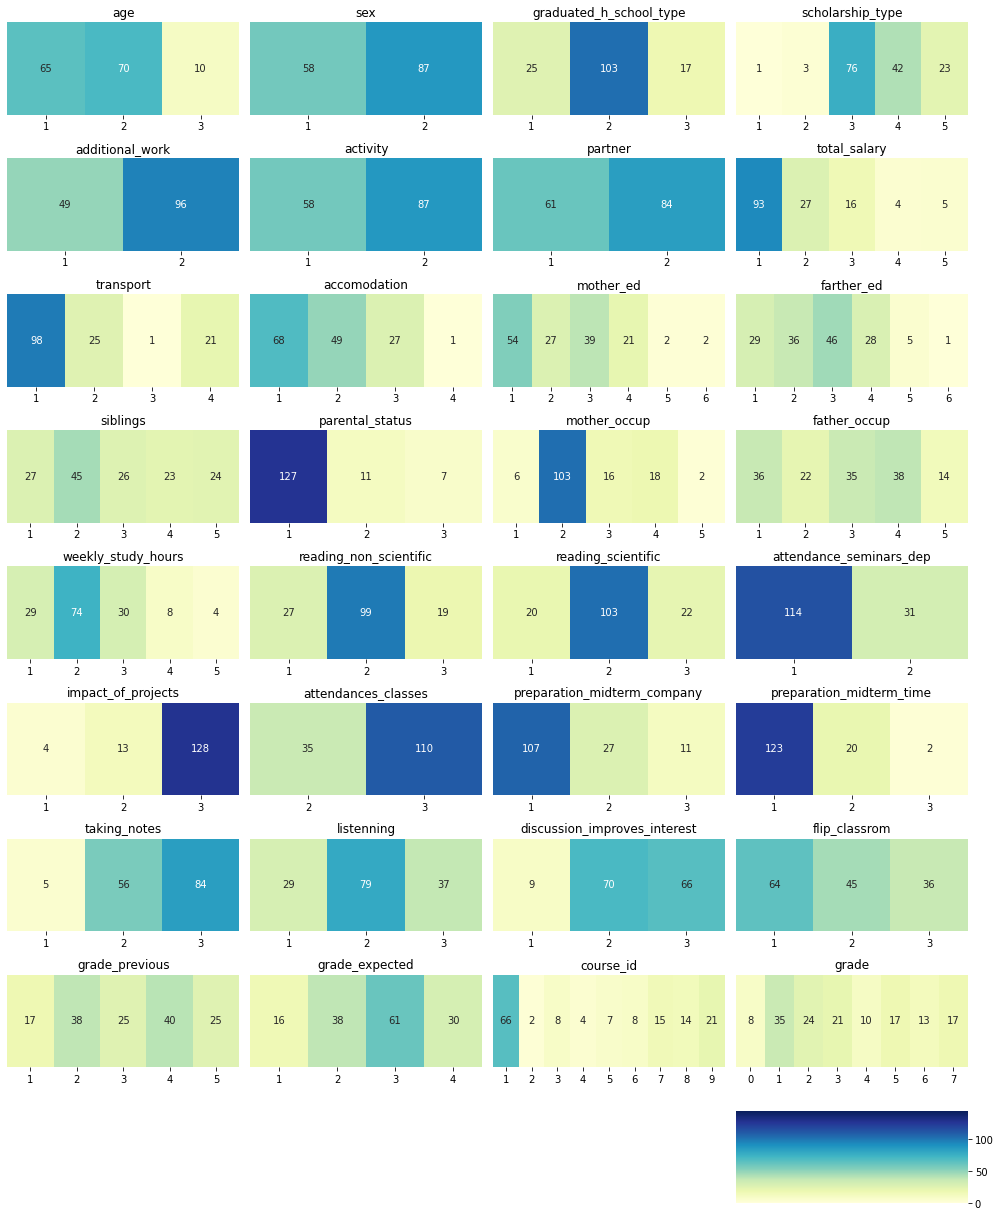

In [16]:
fig1, axes1 = plt.subplots(figsize = (14,17), ncols=4, nrows = 9) #Crear figura
axes1 = axes1.flatten() #Aplanar el array
#Eliminar ejes que sobran
fig1.delaxes(axes1[-2])
fig1.delaxes(axes1[-3])
fig1.delaxes(axes1[-4])
for columna, axis in zip(df.columns, axes1): #Loop sobre columnas y ejes
    marginal = df[columna].sort_values().value_counts(sort = False) #Calcular distribuciones marginales
    ticks = df[columna].unique() #Obtener las etiquetas de las categorías
    ticks.sort() #Ordenar las etiquetas
    #Dibujar mapa de calor
    sns.heatmap([marginal], vmax = 145, vmin = 0, annot = [marginal], cmap = 'YlGnBu', fmt = 'd',\
                cbar_ax = axes1[-1], ax = axis, xticklabels = ticks, yticklabels = False)
    axis.set(title = columna)
plt.tight_layout()

Observamos que dentro de las características hay ciertas categorías con muy pocas observaciones.
Para los modelos de aprendizaje de maquina puede ser díficil determinar el efecto de estas categorías, asi como también podria darse el caso de que al hacer validación cruzada todas las observaciones queden en el set de entrenamiento, o en el de prueba contribuyendo al sobreajuste.

Las categorías con menos de 10 observaciones (valor elegido arbitrariamente) serán unidas a otras categorías, cuando sea posible, de la siguiente manera:
- Para variables ordinales se uniran a la categoría más cercana.
- Para variables nominales se uniran en una variable 'otros', si es que no existe todavía.

Las excepciones a esto son las características 'accomodation' (la categoría con una observación ya corresponde a la categoría otros), 'preparation_midterm_time' (la categoría con 2 observaciones no tiene con quien unirse).

In [17]:
#Combinar varias categorías
df['scholarship_type'] = df['scholarship_type'].replace([1,2],[3,3])
df['total_salary'] = df['total_salary'].replace([4,5],[3,3])
df['transport'] = df['transport'].replace(3,4)
df['mother_ed'] = df['mother_ed'].replace([5,6],[4,4])
df['farther_ed'] = df['farther_ed'].replace([5,6],[4,4])
df['parental_status'] = df['parental_status'].replace([2,3],[4,4])
df['mother_occup'] = df['mother_occup'].replace([1,5],[6,6])
df['weekly_study_hours'] = df['weekly_study_hours'].replace(5,4)
df['impact_of_projects'] = df['impact_of_projects'].replace(1,2)
df['taking_notes'] = df['taking_notes'].replace(1,2)
df['discussion_improves_interest'] = df['discussion_improves_interest'].replace(1,2)
df['course_id'] = df['course_id'].replace([2,3,4,5,6],[10,10,10,10,10])

Con estos cambios las características cambiadas quedan con las siguientes definiciones:

    scholarship_type - Scholarship type: (3: 50% or less, 4: 75%, 5: Full)
    total_salary - Total salary if available (1: USD 135-200, 2: USD 201-270, 3: Above USD 271)
    transport - Transportation to the university: (1: Bus, 2: Private car/taxi, 4: Other)
    accomodation - Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
    mother_ed - Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university or above)
    farther_ed - Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university or above)
    parental_status - Parental status: (1: married, 4: other)
    mother_occup - Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
    weekly_study_hours - Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: more than 11 hours)
    impact_of_projects - Impact of your projects/activities on your success: (1: negative, 2: neutral, 3: positive)
    attendances_classes -  Attendance to classes (1: never, 2: sometimes, 3: always)
    taking_notes - Taking notes in classes: (2: not always, 3: always)
    discussion_improves_interest - Discussion improves my interest and success in the course: (2: not always, 3: always)
    course_id - Course id: (1: course 1, 7: course 7, 8: course 8, 9: course 9, 10: other) 

Construimos el gráfico de arriba nuevamente para ver los cambios

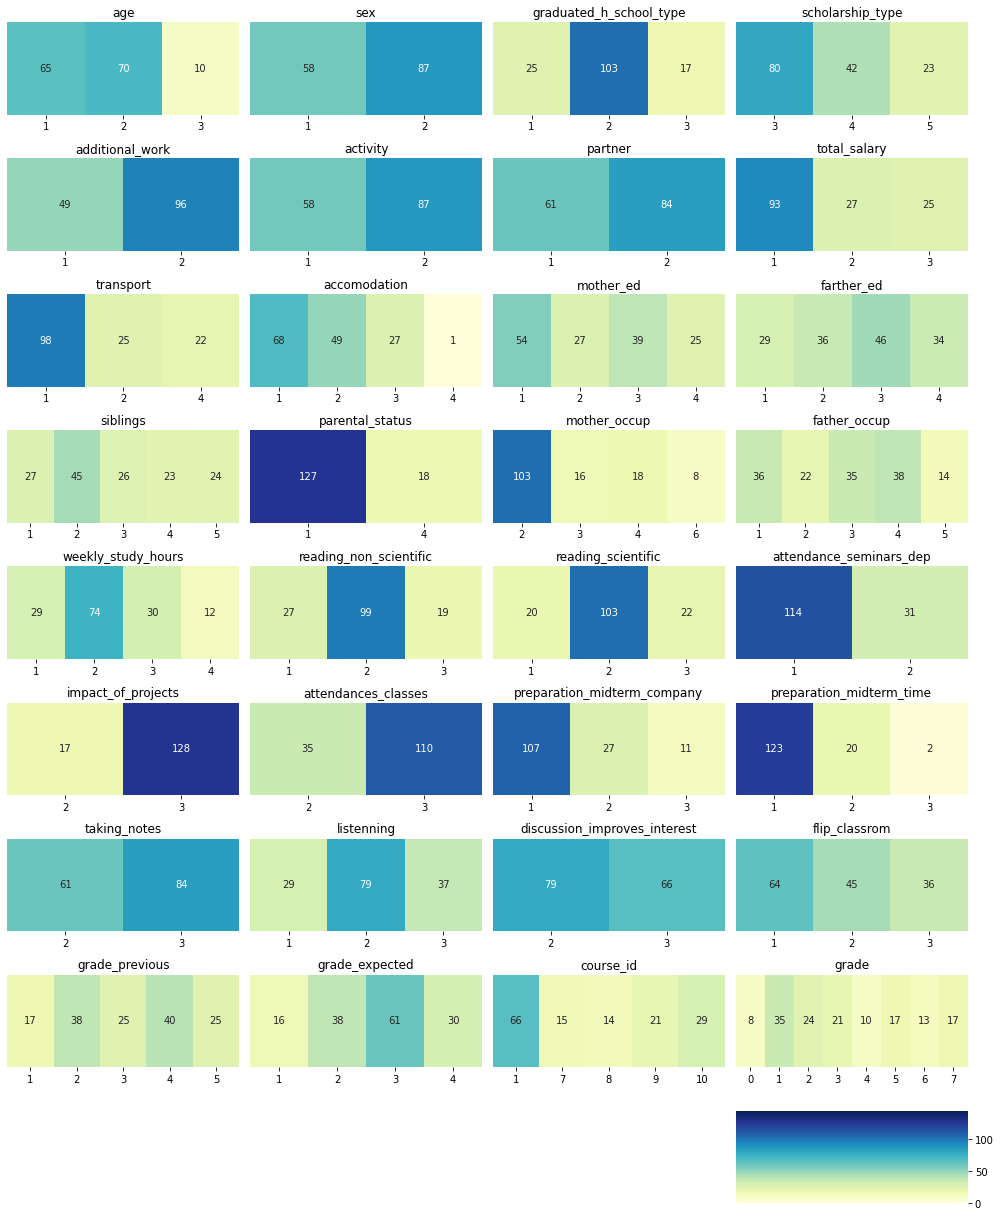

In [18]:
fig2, axes2 = plt.subplots(figsize = (14,17), ncols=4, nrows = 9) #Crear figura
axes2 = axes2.flatten() #Aplanar el array
#Eliminar ejes que sobran
fig2.delaxes(axes2[-2])
fig2.delaxes(axes2[-3])
fig2.delaxes(axes2[-4])
for columna, axis in zip(df.columns, axes2): #Loop sobre columnas y ejes
    marginal = df[columna].sort_values().value_counts(sort = False) #Calcular distribuciones marginales
    ticks = df[columna].unique() #Obtener las etiquetas de las categorías
    ticks.sort() #Ordenar las etiquetas
    #Dibujar mapa de calor
    sns.heatmap([marginal], vmax = 145, vmin = 0, annot = [marginal], cmap = 'YlGnBu', fmt = 'd',\
                cbar_ax = axes2[-1], ax = axis, xticklabels = ticks, yticklabels = False)
    axis.set(title = columna)
plt.tight_layout()

Calculamos también la matriz de correlaciones de spearman entre las variables ordinales y categoricas binarias

In [19]:
#Calcular correlaciones
corr = df[binarias + ordinales].corr(method = 'spearman')
corr

,sex,additional_work,activity,partner,attendance_seminars_dep,age,scholarship_type,total_salary,mother_ed,farther_ed,...,reading_non_scientific,reading_scientific,impact_of_projects,attendances_classes,taking_notes,listenning,discussion_improves_interest,grade_previous,grade_expected,grade
sex,1.000000,0.190476,0.224138,-0.125471,-0.363971,0.121486,-0.183628,0.032398,0.078131,0.146151,...,0.048785,-0.006961,0.140028,0.065795,0.045626,-0.186422,0.039576,0.239403,0.308346,0.331418
additional_work,0.190476,1.000000,0.220238,0.100010,-0.018640,-0.160939,0.032637,-0.062200,0.162569,0.226785,...,-0.094685,-0.172383,0.102208,-0.028198,-0.077197,-0.163732,0.038163,0.033430,0.010480,0.162538
activity,0.224138,0.220238,1.000000,-0.011406,-0.020602,0.142205,-0.160744,0.134334,-0.129925,-0.110963,...,-0.278769,-0.214957,0.052511,-0.098693,-0.011406,0.002237,-0.045230,0.003625,-0.100829,-0.048392
partner,-0.125471,0.100010,-0.011406,1.000000,0.103634,0.044859,0.118939,-0.065085,-0.050528,0.047192,...,0.091535,-0.003977,-0.050013,-0.154225,-0.018735,-0.056239,0.049528,-0.059779,-0.006694,-0.040751
attendance_seminars_dep,-0.363971,-0.018640,-0.020602,0.103634,1.000000,-0.236318,0.226369,-0.161463,-0.024966,-0.172766,...,-0.068581,0.143931,-0.175977,-0.059643,0.205857,0.007128,0.030052,-0.189543,-0.051333,-0.191392
age,0.121486,-0.160939,0.142205,0.044859,-0.236318,1.000000,-0.372424,0.107085,-0.068060,-0.040642,...,0.063012,0.060175,0.002868,-0.059299,-0.167286,0.219238,-0.043544,0.150770,0.082118,-0.070318
scholarship_type,-0.183628,0.032637,-0.160744,0.118939,0.226369,-0.372424,1.000000,-0.153236,-0.068452,-0.205426,...,0.041947,0.041977,-0.055983,0.132275,0.132527,0.030674,0.165699,0.215149,0.224058,0.079437
total_salary,0.032398,-0.062200,0.134334,-0.065085,-0.161463,0.107085,-0.153236,1.000000,0.071258,0.036540,...,-0.185593,-0.052063,-0.013237,-0.198118,-0.226623,-0.051162,-0.115827,-0.143238,-0.081336,-0.173712
mother_ed,0.078131,0.162569,-0.129925,-0.050528,-0.024966,-0.068060,-0.068452,0.071258,1.000000,0.437454,...,-0.000271,0.011502,0.004545,0.061909,0.015158,-0.035584,-0.023663,-0.036876,-0.019345,0.048843
farther_ed,0.146151,0.226785,-0.110963,0.047192,-0.172766,-0.040642,-0.205426,0.036540,0.437454,1.000000,...,-0.013760,-0.120005,0.031036,-0.081765,0.016941,-0.087881,-0.129725,-0.079947,-0.176182,0.043744


y la graficamos para una visualización más fácil.

<Axes: >

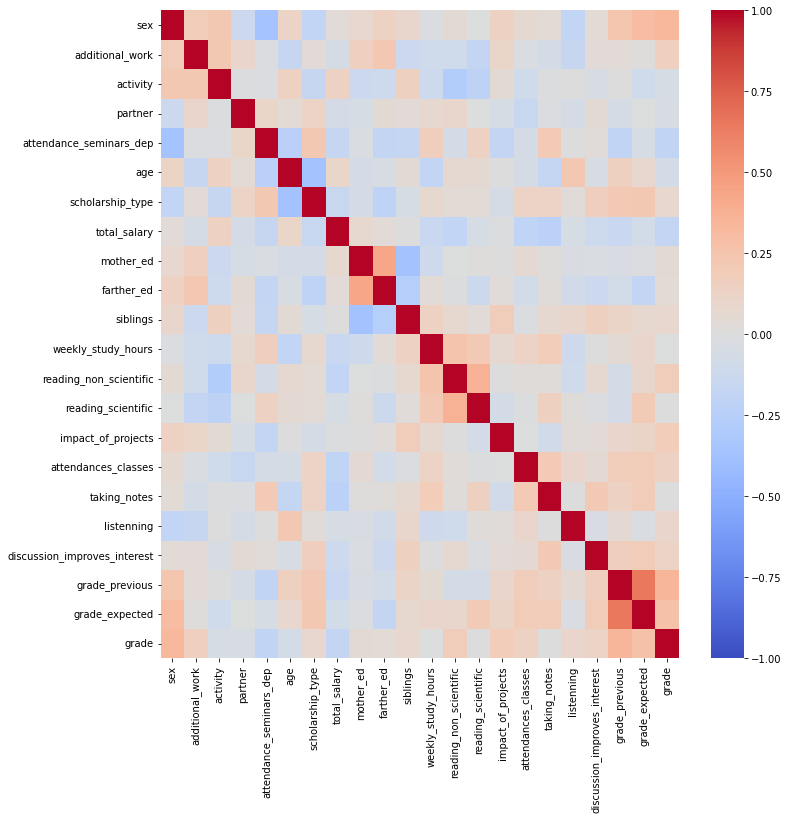

In [20]:
#Crear figura
fig3 = plt.figure(figsize = (9,9))
axis3 = fig3.add_axes([0,0,1,1])
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', ax = axis3)

Observamos correlaciones positivas moderadamente débiles entre la variable objetivo 'grade' y las características 'grade_previous', 'sex' y 'grade_expected', y correlaciones muy debiles con las demás características (valor absoluto de la correlación menor a 0.2)

Por último hacemos un pequeño análisis bivariado, entre todas las características y la variable objetivo.

Se grafican las distribuciones conjuntas de cada caraterística con la variable objetivo. El número de cada celda indica el número de observaciones con esos valores de característica y variable objetivo.
Las celdas estan coloreadas según las observaciones en las columnas (o valor de la característica), el color se vuelve más intenso mientras mayor es la fracción de observaciones de esa columna que tienen un valor particular de 'grade'. Por ejemplo, accomodation en la columna 4 tiene una celda con un color muy intenso: esta celda concentra el 100% de las observaciones (una observación) para ese valor de accomodation.
La coloración no toma en cuenta el balance de la característica.

Características donde las categorías estan más o menos balanceadas, y tienen columnas con tonos muy distintos serían buenos predictores de la variable objetivo.

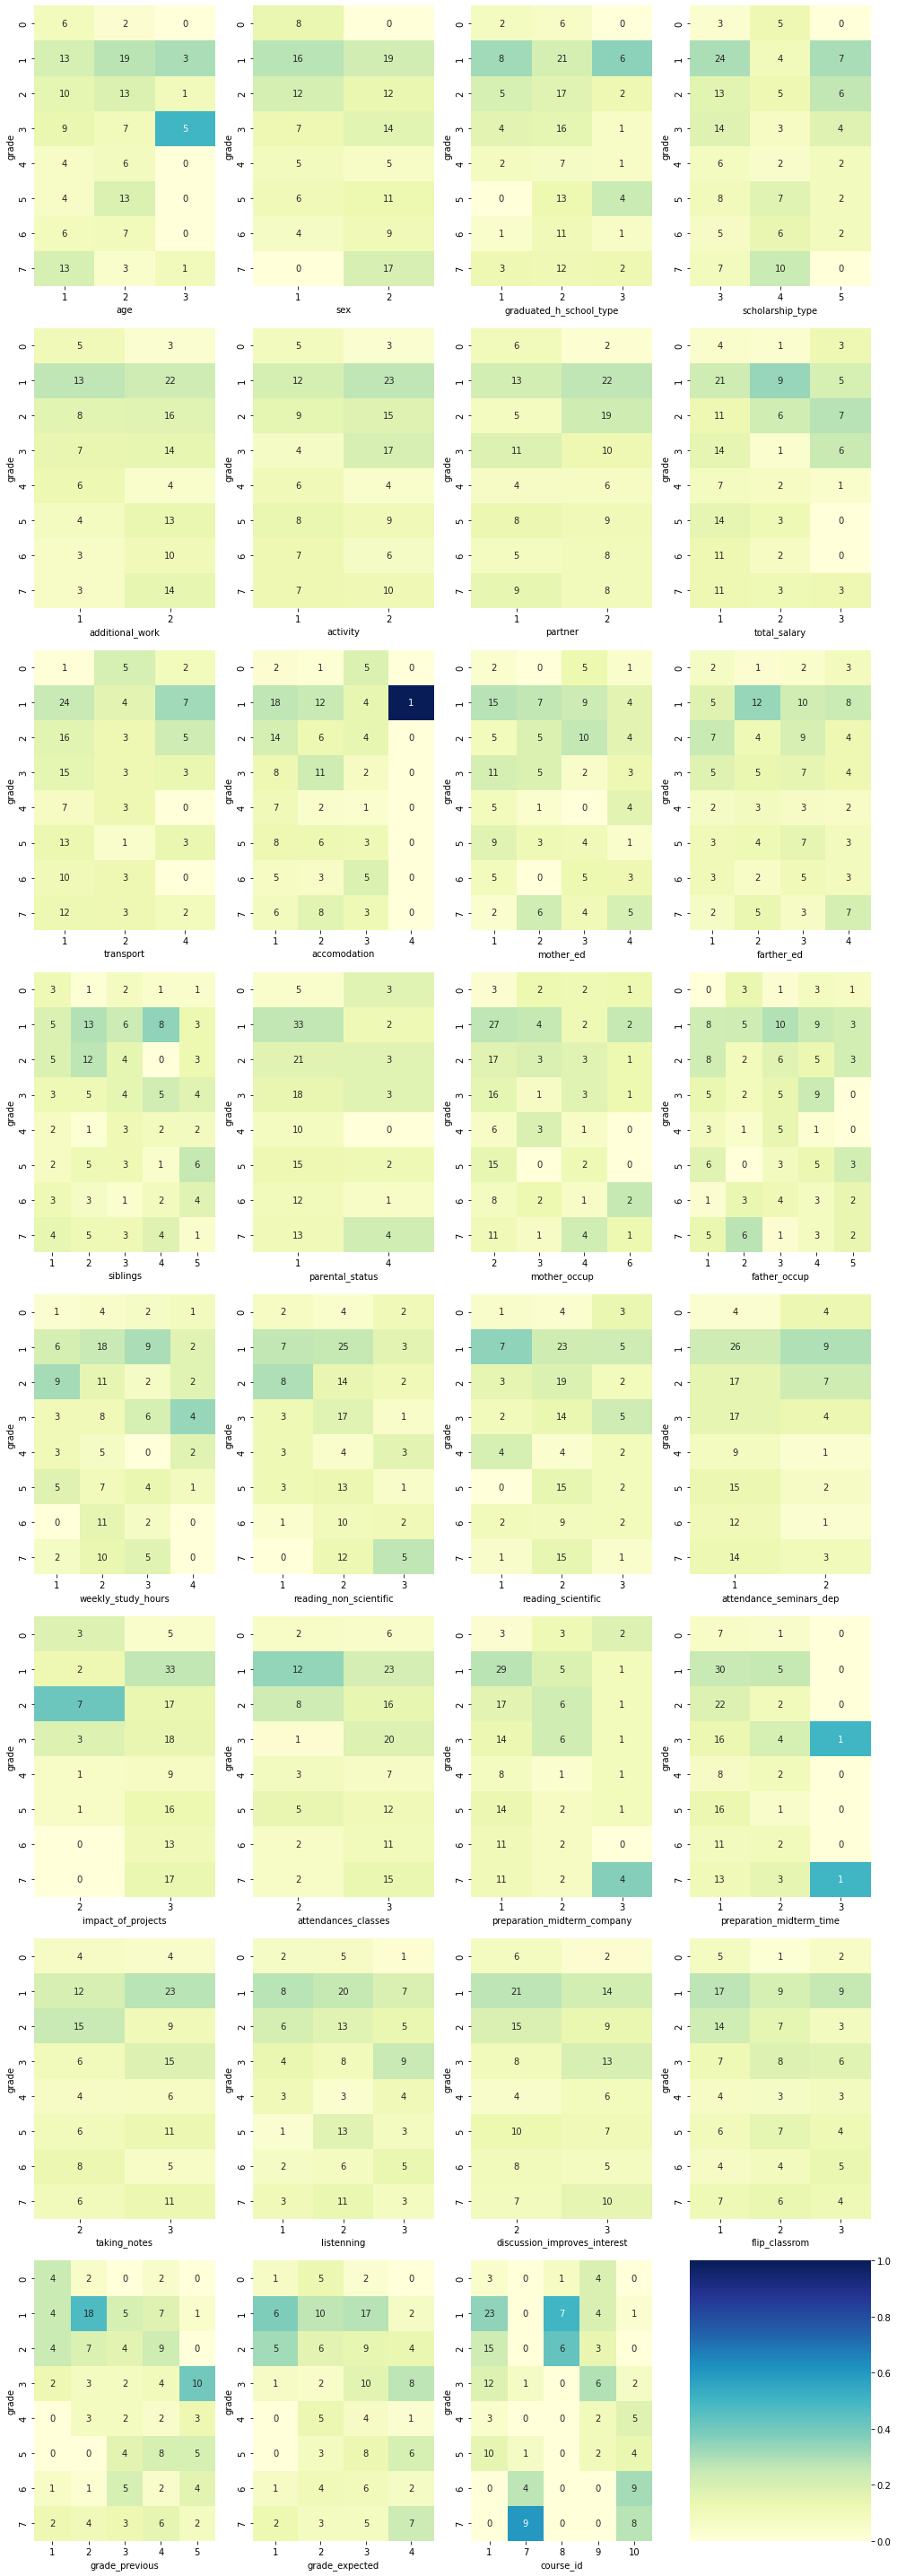

In [21]:
fig4, axes4 = plt.subplots(figsize = (14,40), ncols=4, nrows = 8) #Crear figura
axes4 = axes4.flatten() #Aplanar el array
for columna, axis in zip(df.drop('grade', axis = 1).columns, axes4): #Loop sobre columnas y ejes   
    tabla1 = pd.crosstab(df['grade'],df[columna]) #Calcular tabla de frecuencias
    tabla2 = pd.crosstab(df['grade'],df[columna], normalize = 'columns') #Calcular tabla de frecuencias relativas
    sns.heatmap(tabla2, vmax = 1, vmin = 0, annot = tabla1, cmap = 'YlGnBu', fmt = 'd', cbar_ax = axes4[-1], ax = axis) 
plt.tight_layout()

Notamos que basado en este análisis solo 'grade_previous', 'course_id' y quizás 'grade_expected' parecen ser buenos predictores.
Las demás características con grandes diferencias en tonos, como 'preparation_midterm_time', 'impact_of_projects' o 'accomodation' también son características bastantes desbalanceadas.

# 4 Construcción de un modelo de aprendizaje de maquina

## 4.1 Definición del modelo 

A pesar de las observaciones anteriores, incluimos todas las características en el modelo ya que un simple análisis bivariado no toma en cuenta todas las relaciones entre las características, y características que parecen no tener poder de predicción podrían resultar ser importantes. 

Elegimos usar modelos basados en árboles de decisión ya que estos pueden manejar características ordinales sin que el resultado dependa de los números elegidos para hacer la codificación. Además estos modelos pueden manejar variables faltantes, lo que les permite manejar los casos donde una categoría este en el conjunto de pruebas pero no en el de entrenamiento.

Idealmente usaríamos árboles capaces de hacer regresión o clasificación ordinal, pero estos métodos no estan disponibles en sklearn. En vez de eso tratamos el problema como una clasificación multiclase. Como métrica para optimzar los hiperparametros usamos el coeficiente kappa de Cohen con ponderación cuadrática, que castiga más duramente predicciones que estan más lejos de la predicción real, además de tomar en cuenta el desbalance de las clases. Desgraciadamente kappa no es fácil de interpretar, y nos ahorramos ese ejercicio. 

A pesar de que accuracy tiene la propiedad desafortunada de ser 'todo o nada' respecto a las predicciones, es decir, le da el mismo peso a todos los errores, la usaremos también por su fácilidad de interpretación.

## 4.2 Preprocesamiento de variables

Los modelos de árboles de decisión son indiferentes a la escala de los datos por lo que no aplicamos ningún preprocesamiento a las variables ordinales.
La implementación de sklearn de árboles de decisión no trabaja directamente con características nominales, por lo que usamos one hot encoder para estas.

In [22]:
#Asignarle tipo categórico a las características nominales
for variable in nominales:
    df[variable] = pd.Categorical(df[variable])
#Aplicar encoder
df = pd.get_dummies(df, drop_first = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            145 non-null    int64
 1   scholarship_type               145 non-null    int64
 2   total_salary                   145 non-null    int64
 3   mother_ed                      145 non-null    int64
 4   farther_ed                     145 non-null    int64
 5   siblings                       145 non-null    int64
 6   weekly_study_hours             145 non-null    int64
 7   reading_non_scientific         145 non-null    int64
 8   reading_scientific             145 non-null    int64
 9   impact_of_projects             145 non-null    int64
 10  attendances_classes            145 non-null    int64
 11  taking_notes                   145 non-null    int64
 12  listenning                     145 non-null    int64
 13  discussion_improves_

Finalmente construimos las matrices de características y el vector de objetivos

In [24]:
X = df.drop(columns = 'grade')
y = df['grade']

## 4.3 Validación cruzada 

Primero dividimos los datos en un conjunto de entrenamiento y de pruebas. Aprovechando el hecho de que 145 es multiplo de 5 dejamos 80% de los datos para entrenamiento y 20% para pruebas. Usamos estratificación para que la distribución de la variable objetivo sea la misma tanto en las pruebas como en el entrenamiento.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

Luego aplicamos validación cruzada con K = 4 (la cantidad de datos en el conjunto de pruebas es divisible por 4) y 10 repeticiones. También aplicamos estratificación. Usamos estas divisiones para optimizar los hiperparametros, y para darnos una idea de la variación del desempeño del modelo. 

In [26]:
#Crear divisiones
folds = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 10, random_state = 42)

## 4.4 Entrenamiento del modelo y optimización de hiperparametros

Primero ajustamos un único arbol de decisión a todo el conjunto de entrenamiento para ver el rango del hiperparametro ccp_alpha.

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.cost_complexity_pruning_path(X_train,y_train)['ccp_alphas']

array([0.        , 0.0075431 , 0.00862069, 0.00862069, 0.00862069,
       0.00862069, 0.00862069, 0.00862069, 0.00862069, 0.01077586,
       0.01149425, 0.01149425, 0.01149425, 0.01149425, 0.01293103,
       0.01293103, 0.01293103, 0.01322492, 0.0137931 , 0.01398467,
       0.01400862, 0.01551724, 0.0158046 , 0.01593521, 0.01616379,
       0.01628352, 0.01662562, 0.01677842, 0.01992337, 0.02011494,
       0.02025178, 0.02068966, 0.02090517, 0.02264847, 0.02279479,
       0.02442529, 0.03920082, 0.05096596])

Ahora preparamos el optimizador que ajustara el modelo a la vez que intenta optimizar los hiperparametros. Utilizamos el modulo hyperopt version 0.2.7
Consideramos como modelos un único arbol de decisión y un random forest.
Para el random forest no optimizamos el número de arboles, si no que elegimos un valor suficientemente grande que se espera sea suficiente para estabilizar la varianza.

Para ambos clasificadores optimizamos:

max_depth, min_sample_leaf: controlan la complejidad del árbol.

ccp_alpha: un hiperparametro de regularización que controla la poda del árbol.

class_weight: No es un hiperparametro de por sí pero podemos probar si ponderar las clases ayuda a mejorar el ajuste.
En caso de que la respuesta sea positiva podemos considerar métodos de balanceo.

Además para random forest optimizamos:

max_features: controla cuantas características pueden ser consideradas al dividir los nodos del árbol.

In [28]:
#Convertimos nuestra métrica en una función de scoring
kappa_scoring = make_scorer(cohen_kappa_score, weights = 'quadratic')
accuracy_scoring = make_scorer(accuracy_score)

In [29]:
#Definimos ahora el espacio de busqueda.
#El optimizador intentara cada modelo definido abajo con los hiperparametros que le corresponden.
space = hp.choice('classifier_type', [
        #Hiperparametros para árbol de decisión
    {   'type': 'decision_tree',
        'max_depth': hp.quniform('dt.max_depth', 1, 50, 1),
        'min_samples_leaf': hp.quniform('dt.min_samples_leaf', 1, 10, 1),
        'class_weight': hp.choice('dt.class_weight', ['balanced', None]),
        'ccp_alpha': hp.uniform('dt.ccp_alpha', 0.001,0.05)
    },
        #Hiperparametros para random_forest
    {   'type': 'random_forest',
        'max_depth': hp.quniform('rf.max_depth', 1, 50, 1),
        'min_samples_leaf': hp.quniform('rf.min_samples_leaf', 1, 10, 1),
        'class_weight': hp.choice('rf.class_weight', ['balanced', None]),
        'max_features': hp.quniform('rf.max_features', 1, 46, 1),
        'ccp_alpha': hp.uniform('rf.ccp_alpha', 0.001,0.05)
    }])

In [30]:
#Creamos la función a minimizar
def wkappa_cv(params):
    """Esta función entrena el clasificador con los parametros que entrega hyperopt 
    y devuelve el score usando validación cruzada """
    #Definir el clasificador según lo que entrega hyperopt
    classifier_type = params['type']
    del params['type']
    if classifier_type == 'decision_tree':
        #Convierte los tipos para que no se caiga el cálculo
        max_depth = int(params['max_depth'])
        min_samples_leaf = int(params['min_samples_leaf'])
        del params['max_depth']
        del params['min_samples_leaf']

        #Ajustar modelo
        model = DecisionTreeClassifier(random_state = 42,
                                       max_depth = max_depth, min_samples_leaf = min_samples_leaf,
                                       **params)
    elif classifier_type == 'random_forest':
        #Convierte los tipos para que no se caiga el cálculo
        max_depth = int(params['max_depth'])
        min_samples_leaf = int(params['min_samples_leaf'])
        max_features = int(params['max_features'])
        del params['max_depth']
        del params['min_samples_leaf']
        del params['max_features']

        #Ajustar modelo
        model = RandomForestClassifier(random_state = 42, n_estimators = 250, 
                                       max_depth = max_depth, min_samples_leaf = min_samples_leaf,
                                       max_features = max_features, **params)                 
      
    #Calcular el kappa ponderado promedio usando validación cruzada
    score = cross_val_score(model, X_train, y_train, cv=folds, scoring=kappa_scoring, n_jobs=8).mean()
    
    #Hyperopt minimiza así que la función entrega el score negativo
    return -score

In [31]:
#Corre la optimización. Toma cerca de 2 minutos en mi maquina
optimo=fmin(fn=wkappa_cv, # Función a optimizar
          space=space, #Espacio de busqueda
          algo=tpe.suggest, # Algoritmo de optimización bayesiano
          max_evals=300, # Numero de iteraciones
          rstate=np.random.default_rng(42)
         )

100%|██████| 300/300 [02:30<00:00,  1.99trial/s, best loss: -0.7513844914007567]


Ahora revisamos cuales son los hiperparametros óptimos

In [32]:
print(space_eval(space, optimo))

{'ccp_alpha': 0.025338099463101005, 'class_weight': None, 'max_depth': 3.0, 'min_samples_leaf': 4.0, 'type': 'decision_tree'}


El modelo elegido fue un único arbol de decisión de poca profundidad

In [33]:
clf = DecisionTreeClassifier(ccp_alpha = 0.0243832317581609, max_depth = 3, min_samples_leaf = 4)

Vemos como le fue a nuestro modelo en los splits de la validación cruzada

In [34]:
cvs = cross_val_score(clf, X_train, y_train, cv=folds, scoring=kappa_scoring, n_jobs=8)
cvs = pd.DataFrame(cvs)
cvs.describe()

,0
count,40.000000
mean,0.751414
std,0.081770
min,0.462963
25%,0.727655
50%,0.776836
75%,0.802587
max,0.855232


Vemos que kappa es en la mayoría de las casos mayor a 0.7, con una desviación estandar de un 8%. El modelo parece ser algo inestable, algunas veces se observan kappas altos de 0.86, mientras que algunas veces ha disminuido hasta 0.46.

Revisamos el accuracy

In [35]:
cvs = cross_val_score(clf, X_train, y_train, cv=folds, scoring=accuracy_scoring, n_jobs=8)
cvs = pd.DataFrame(cvs)
cvs.describe()

,0
count,40.000000
mean,0.339655
std,0.083940
min,0.137931
25%,0.275862
50%,0.344828
75%,0.413793
max,0.482759


A pesar de que el modelo no fue optimizado con accuracy en mente, vemos que alcanza un accuracy promedio de 34.5%. 
Sin embargo notamos también que la desviación estandar es de 8.4%, y en el 25% de los casos el accuracy es menor a 28%, prácticamente equivalente a solo elegir la clase mayoritaria. En los peores casos vemos un accuracy de 14%, peor que siempre elegir la clase mayoritaria.
Podemos concluir que nuestro clasificador no tiene un desempeño muy estable, y no hay que tomar muy en serio sus predicciones.

Finalmente ajustamos el modelo a todos los datos de entrenamiento

In [36]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Y calculamos las métricas en el conjunto de pruebas.

In [37]:
cohen_kappa_score(y_test,y_pred, weights = 'quadratic')

np.float64(0.7059907834101382)

Vemos que el valor de kappa esta dentro del primer cuartil de los valores que obtuvimos en la validación cruzada, por lo que se podría considerar bajo. Sin embargo esta a menos de una desviación estandar de la media por lo que es algo esperado.

In [38]:
accuracy_score(y_test,y_pred)

0.41379310344827586

Por otro lado el accuracy esta en el tercer cuartil, podría decirse que aquí tuvimos buena suerte. Este accuracy tambien esta a menos de una desviación estandar de la media por lo que esta dentro de la variación esperada.

In [39]:
confusion_matrix(y_test,y_pred)

array([[0, 2, 0, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0, 1, 0],
       [0, 5, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 2, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 1],
       [0, 0, 0, 0, 0, 0, 1, 2]])

Observamos que el clasificador tiene una tendencia a predecir la etiqueta de manera excesiva. También observamos una propiedad curiosa del clasificador. Como es un árbol de decisión podemos observar directamente.

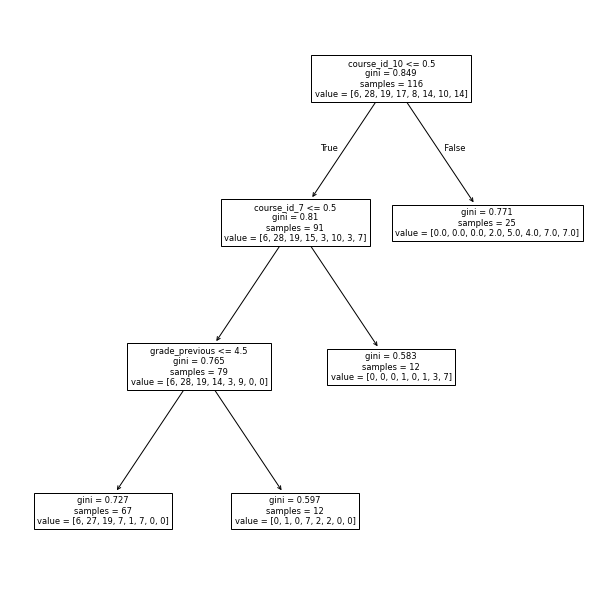

In [40]:
fig4 = plt.figure(figsize = (8,8))
axis4 = fig4.add_axes([0,0,1,1])
plot_tree(clf, ax = axis4, feature_names = X.columns)
plt.show()

Nuestro clasificador es capaz de sólo predecir 4 de las 8 clases (1,3,6,7). No importa las caracterísitcas jamás predecirá la otra mitad de las clases.
Observamos también que el clasificador sólo usa 2 características de las 32, 2 de las cuales identificamos en el análisis exploratorio como posibles predictores: 'grade_previous' y 'course_id'.

# 5. Conclusiones

Hemos ajustado y optimizado los hiperparametros de un modelo de aprendizaje de maquina a los datos del proyecto HESPE.
El modelo óptimo fue un arbol de decisión bastante simple, que de las 32 variables medidas solo utilizó 2, curiosamente las únicas 2 variables que pueden medirse sin necesidad de utilizar la encuesta.

A pesar de que nuestro modelo tuvo un accuracy casi 20% más alto que sólo predecir la clase mayoritaria, el accuracy es bastante bajo siendo de tan sólo 41%, y según los datos de la validación cruzada, 41% es de hecho un valor que se obtiene cuando hay buena suerte con la repartición de los datos. Accuracys menor al 28% (apenas mejor que predecir la clase mayoritaria) ocurren un cuarto del tiempo, y a veces baja tanto que llega a ser peor que predecir la clase mayoritaria. Además el modelo posee un defecto fatal donde a pesar de haber 8 clases, en sus predecciones utiliza 4 de ellas, y a pesar de usar para la optimización una métrica que penaliza errores grandes, observamos que aún así es capaz de cometer el error de predecir la etiqueta 1 (la clase mayoritaria) cuando la etiqueta real es 4 o 5.

Que un modelo tan simple varíe tanto en su desempeño da cuenta de la poca señal que hay en las características elegidas, y llama a volver al principio y reevaluar el proceso de recolección de datos, especialmente la decision de que características medir.


Por otro lado intentar predecir 8 categorías podría considerarse demasiado ambicioso, especialmente cuando parecen haber solo 2 o 3 variables con poder predictivo, y tal vez no es necesario para cumplir los objetivos del estudio. Siempre cuando sea suficiente para cumplir nuestros objetivos y necesidades, siempre esta disponible la opción de reducir nuestras expectativas e intentar resolver un problema más simple, el que podría ser por ejemplo predecir si la nota es menor o mayor a 'CC', o predecir la nota pero permitiendo un error de 1 categoría en cualquier dirección.